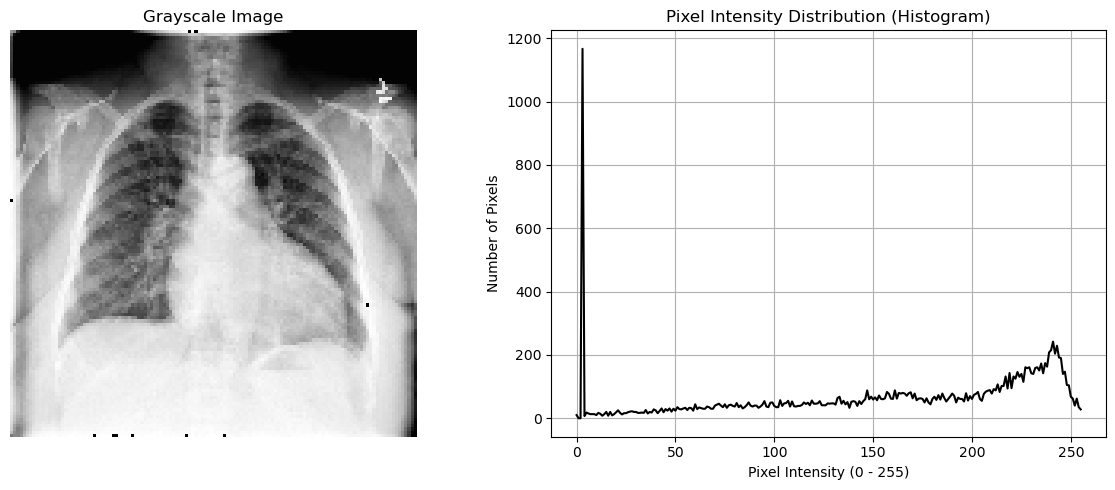

In [11]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

image = cv2.imread('1.png', cv2.IMREAD_GRAYSCALE)
hist = cv2.calcHist([image], [0], None, [256], [0, 256])

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.title('Grayscale Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.plot(hist, color='black')
plt.title('Pixel Intensity Distribution (Histogram)')
plt.xlabel('Pixel Intensity (0 - 255)')
plt.ylabel('Number of Pixels')
plt.grid(True)

plt.tight_layout()
plt.show()


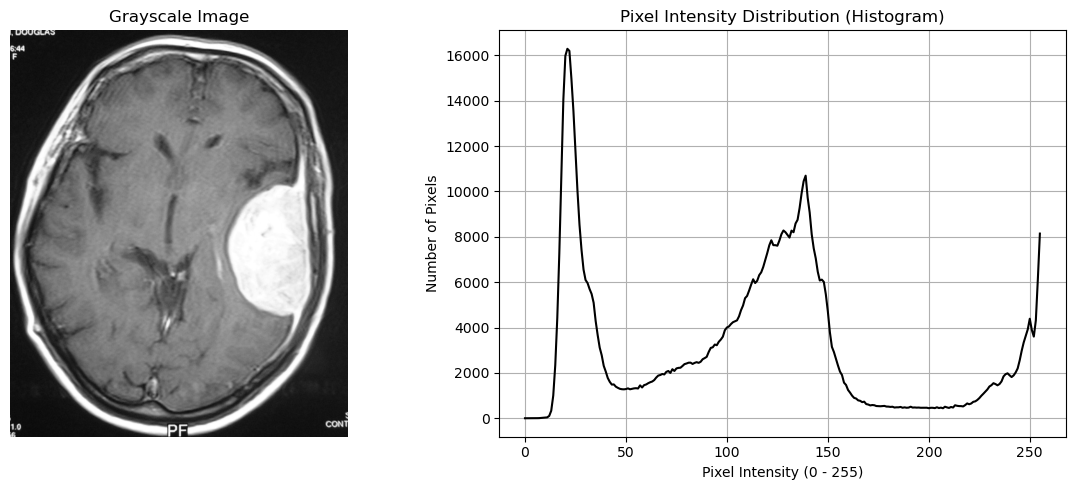

In [12]:
image = cv2.imread('2.jpg', cv2.IMREAD_GRAYSCALE)
hist = cv2.calcHist([image], [0], None, [256], [0, 256])

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.title('Grayscale Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.plot(hist, color='black')
plt.title('Pixel Intensity Distribution (Histogram)')
plt.xlabel('Pixel Intensity (0 - 255)')
plt.ylabel('Number of Pixels')
plt.grid(True)

plt.tight_layout()
plt.show()

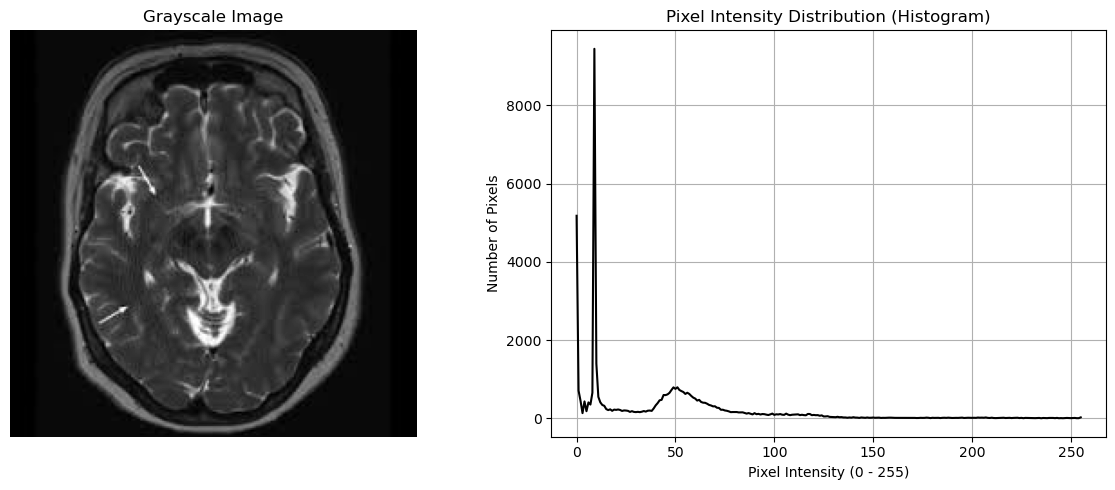

In [13]:
image = cv2.imread('3 no.jpg', cv2.IMREAD_GRAYSCALE)
hist = cv2.calcHist([image], [0], None, [256], [0, 256])

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.title('Grayscale Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.plot(hist, color='black')
plt.title('Pixel Intensity Distribution (Histogram)')
plt.xlabel('Pixel Intensity (0 - 255)')
plt.ylabel('Number of Pixels')
plt.grid(True)

plt.tight_layout()
plt.show()

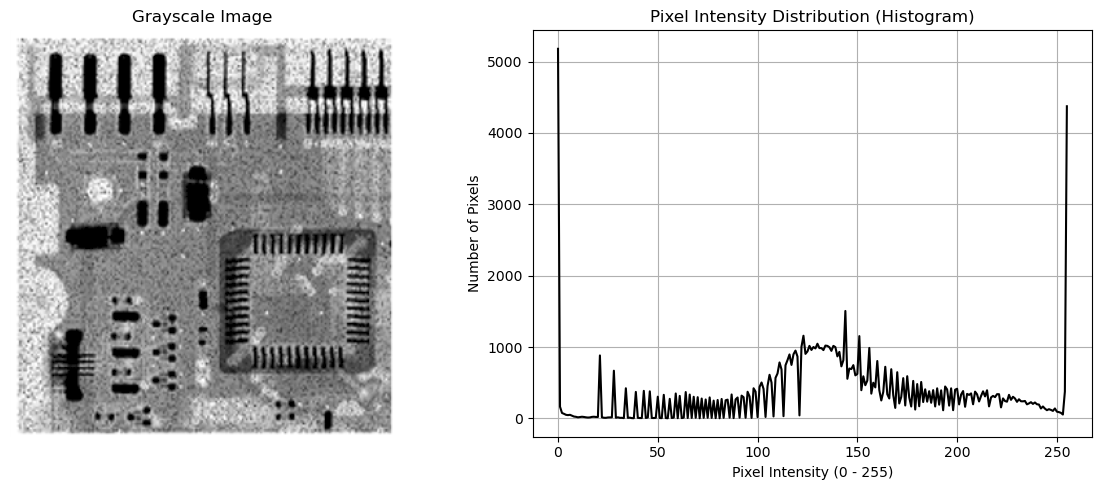

In [14]:
image = cv2.imread('4.png', cv2.IMREAD_GRAYSCALE)
hist = cv2.calcHist([image], [0], None, [256], [0, 256])

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.title('Grayscale Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.plot(hist, color='black')
plt.title('Pixel Intensity Distribution (Histogram)')
plt.xlabel('Pixel Intensity (0 - 255)')
plt.ylabel('Number of Pixels')
plt.grid(True)

plt.tight_layout()
plt.show()

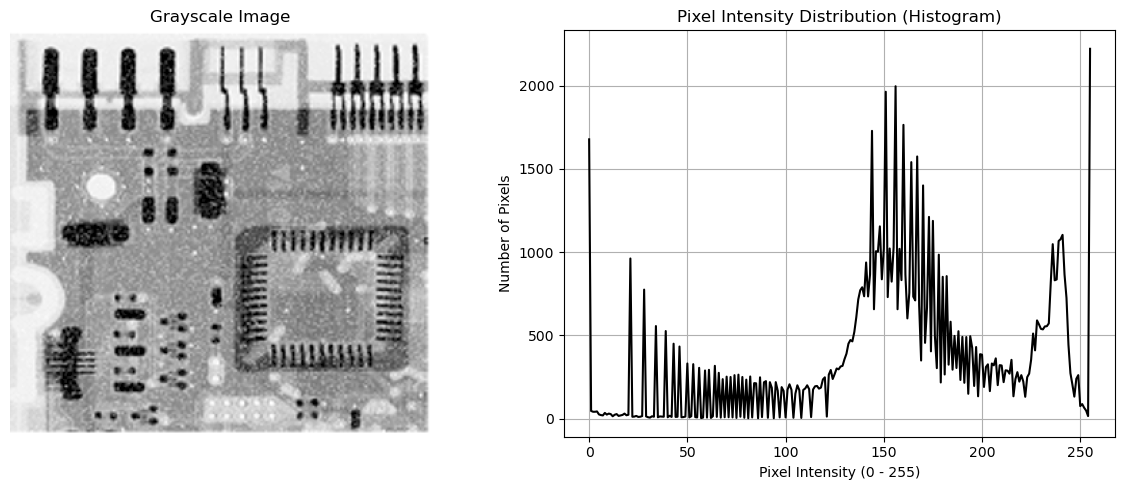

In [15]:
image = cv2.imread('5.png', cv2.IMREAD_GRAYSCALE)
hist = cv2.calcHist([image], [0], None, [256], [0, 256])

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.title('Grayscale Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.plot(hist, color='black')
plt.title('Pixel Intensity Distribution (Histogram)')
plt.xlabel('Pixel Intensity (0 - 255)')
plt.ylabel('Number of Pixels')
plt.grid(True)

plt.tight_layout()
plt.show()

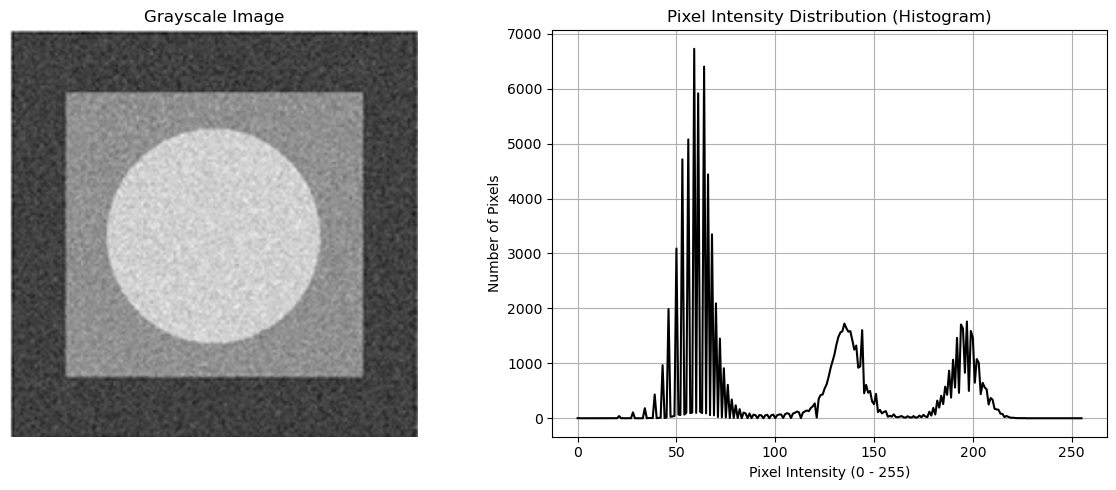

In [16]:
image = cv2.imread('6.png', cv2.IMREAD_GRAYSCALE)
hist = cv2.calcHist([image], [0], None, [256], [0, 256])

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.title('Grayscale Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.plot(hist, color='black')
plt.title('Pixel Intensity Distribution (Histogram)')
plt.xlabel('Pixel Intensity (0 - 255)')
plt.ylabel('Number of Pixels')
plt.grid(True)

plt.tight_layout()
plt.show()

C:\Users\20115\AppData\Local\Temp\ipykernel_35616\1486421842.py:12: RuntimeWarning: divide by zero encountered in log
  log_img = c * (np.log(img + 1))
C:\Users\20115\AppData\Local\Temp\ipykernel_35616\1486421842.py:13: RuntimeWarning: invalid value encountered in cast
  log_img = np.array(log_img, dtype=np.uint8)


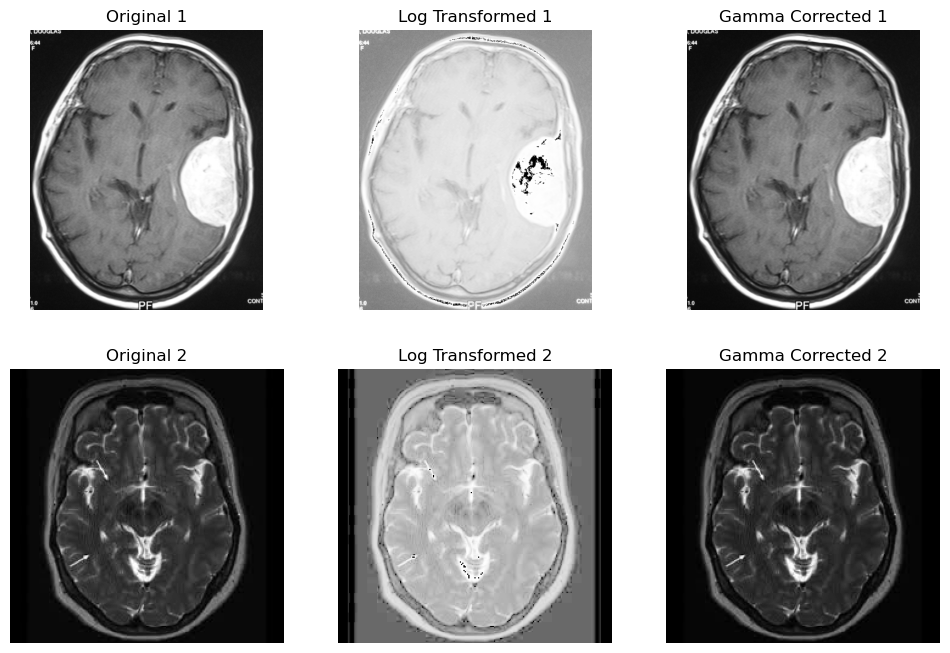

In [18]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load images in grayscale
img1 = cv2.imread("2.jpg", cv2.IMREAD_GRAYSCALE)
img2 = cv2.imread("3 no.jpg", cv2.IMREAD_GRAYSCALE)

# ------------------- Log Transformation -------------------
def log_transform(img):
    c = 255 / (np.log(1 + np.max(img)))   # scaling constant
    log_img = c * (np.log(img + 1))
    log_img = np.array(log_img, dtype=np.uint8)
    return log_img

# ------------------- Power Transformation -------------------
def gamma_transform(img, gamma=3):
    normalized = img / 255.0
    gamma_img = np.power(normalized, gamma)
    gamma_img = np.uint8(gamma_img * 255)
    return gamma_img

log1, log2 = log_transform(img1), log_transform(img2)
gamma1, gamma2 = gamma_transform(img1, 1.1), gamma_transform(img2, 1.1)  # gamma<1 → brighter

titles = ["Original 1", "Log Transformed 1", "Gamma Corrected 1",
          "Original 2", "Log Transformed 2", "Gamma Corrected 2"]
images = [img1, log1, gamma1, img2, log2, gamma2]

plt.figure(figsize=(12,8))
for i in range(6):
    plt.subplot(2, 3, i+1)
    plt.imshow(images[i], cmap='gray')
    plt.title(titles[i])
    plt.axis("off")
plt.show()



C:\Users\20115\AppData\Local\Temp\ipykernel_35616\1778525126.py:20: RuntimeWarning: divide by zero encountered in power
  num = np.sum(np.power(region, Q+1))
C:\Users\20115\AppData\Local\Temp\ipykernel_35616\1778525126.py:21: RuntimeWarning: divide by zero encountered in power
  den = np.sum(np.power(region, Q))
C:\Users\20115\AppData\Local\Temp\ipykernel_35616\1778525126.py:23: RuntimeWarning: invalid value encountered in scalar divide
  result[i, j] = num / den
C:\Users\20115\AppData\Local\Temp\ipykernel_35616\1778525126.py:27: RuntimeWarning: invalid value encountered in cast
  return np.uint8(np.clip(result, 0, 255))


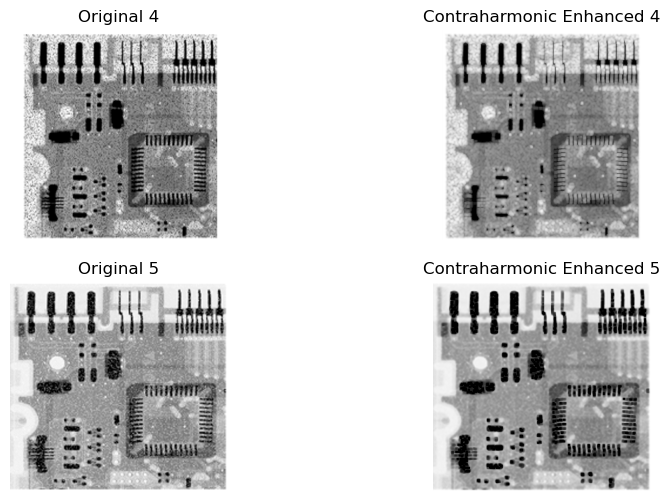

In [21]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def contraharmonic_filter(img, size=3, Q=1.5):
    """
    img: input grayscale image
    size: filter window size (odd number)
    Q: order of filter
        Q > 0 reduces pepper noise
        Q < 0 reduces salt noise
    """
    pad = size // 2
    padded = cv2.copyMakeBorder(img, pad, pad, pad, pad, cv2.BORDER_REFLECT)
    result = np.zeros_like(img, dtype=np.float32)
    
    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
            region = padded[i:i+size, j:j+size].astype(np.float32)
            num = np.sum(np.power(region, Q+1))
            den = np.sum(np.power(region, Q))
            if den != 0:
                result[i, j] = num / den
            else:
                result[i, j] = img[i, j]
    
    return np.uint8(np.clip(result, 0, 255))


img4 = cv2.imread("4.png", cv2.IMREAD_GRAYSCALE)
img5 = cv2.imread("5.png", cv2.IMREAD_GRAYSCALE)

filtered4 = contraharmonic_filter(img4, size=3, Q=3)  
filtered5 = contraharmonic_filter(img5, size=3, Q=-2)

titles = ["Original 4", "Contraharmonic Enhanced 4",
          "Original 5", "Contraharmonic Enhanced 5"]
images = [img4, filtered4, img5, filtered5]

plt.figure(figsize=(10,6))
for i in range(4):
    plt.subplot(2, 2, i+1)
    plt.imshow(images[i], cmap="gray")
    plt.title(titles[i])
    plt.axis("off")
plt.show()

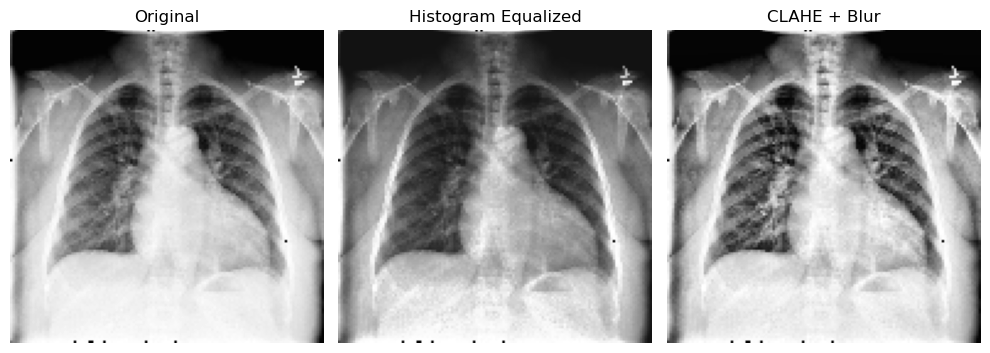

In [22]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

image = cv2.imread("1.png", cv2.IMREAD_GRAYSCALE)
equalized = cv2.equalizeHist(image)

# Apply Contrast Limited Adaptive Histogram Equalization (CLAHE)
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
clahe_applied = clahe.apply(image)

blurred = cv2.GaussianBlur(clahe_applied, (1, 1), 0)

plt.figure(figsize=(10, 8))
plt.subplot(1, 3, 1), plt.title('Original'), plt.imshow(image, cmap='gray'), plt.axis('off')
plt.subplot(1, 3, 2), plt.title('Histogram Equalized'), plt.imshow(equalized, cmap='gray'), plt.axis('off')
plt.subplot(1, 3, 3), plt.title('CLAHE + Blur'), plt.imshow(blurred, cmap='gray'), plt.axis('off')
plt.tight_layout()
plt.show()

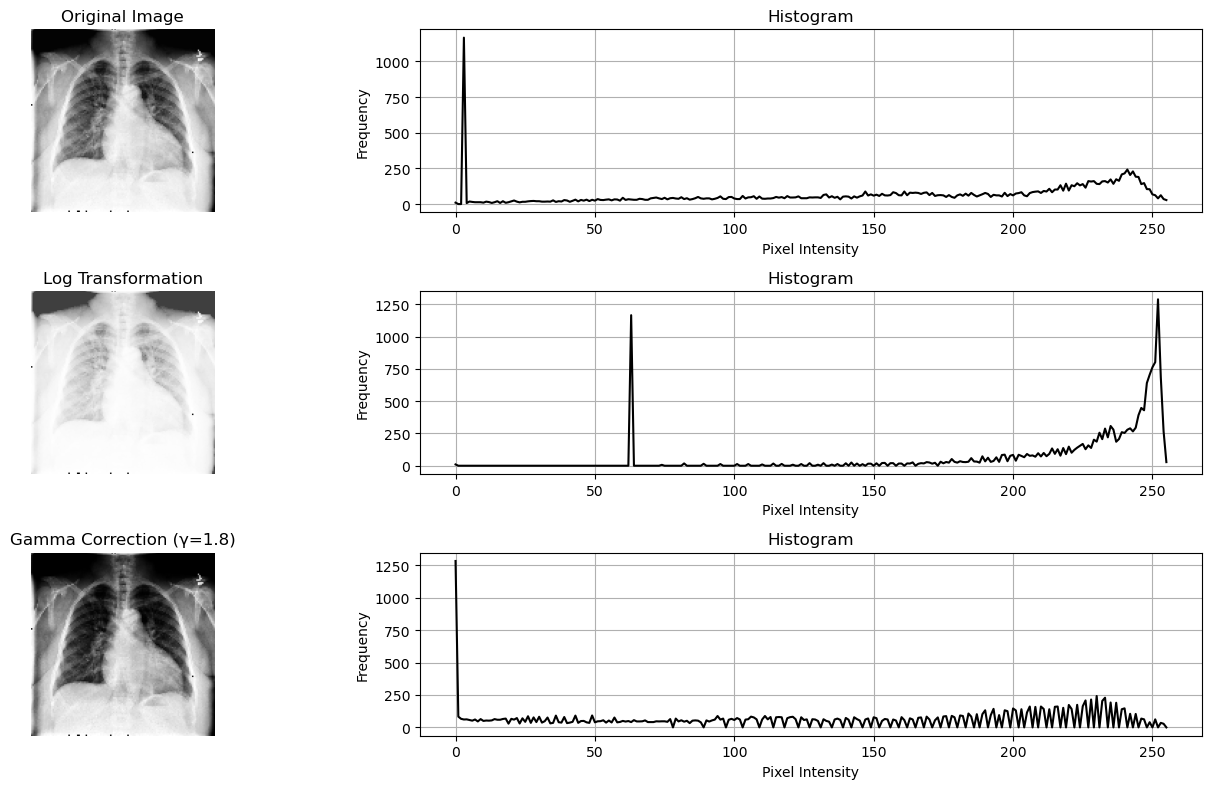

In [24]:
# ---------------- LOG TRANSFORMATION ----------------
c_log = 255 / np.log(1 + np.max(image))
log_image = c_log * np.log(1 + image.astype(np.float32))
log_image = np.uint8(np.clip(log_image, 0, 255))

# ---------------- POWER-LAW (GAMMA) TRANSFORMATION ----------------
gamma = 1.8  # try 0.4 for brightening, >1 for darkening
c_gamma = 255.0 / (np.max(image) ** gamma)
gamma_image = c_gamma * (image.astype(np.float32) ** gamma)
gamma_image = np.uint8(np.clip(gamma_image, 0, 255))

images = [image, log_image, gamma_image]
titles = ['Original Image', 'Log Transformation', f'Gamma Correction (γ={gamma})']

plt.figure(figsize=(15, 8))
for i in range(3):
    plt.subplot(3, 2, 2 * i + 1)
    plt.imshow(images[i], cmap='gray')
    plt.title(titles[i])
    plt.axis('off')
    plt.subplot(3, 2, 2 * i + 2)
    hist = cv2.calcHist([images[i]], [0], None, [256], [0, 256])
    plt.plot(hist, color='black')
    plt.title('Histogram')
    plt.xlabel('Pixel Intensity')
    plt.ylabel('Frequency')
    plt.grid(True)

plt.tight_layout()
plt.show()


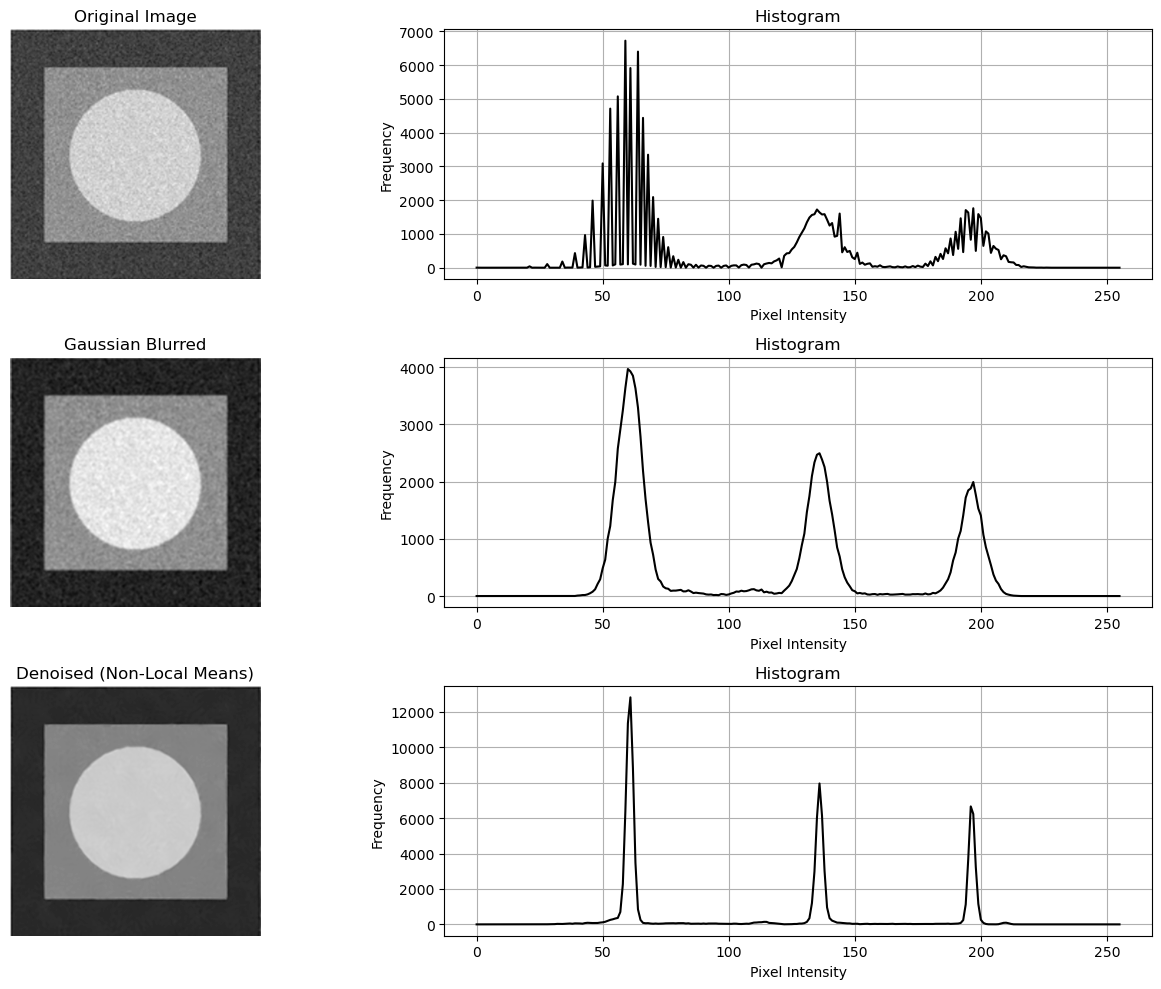

In [25]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load image in grayscale
image = cv2.imread('6.png', cv2.IMREAD_GRAYSCALE)

# ---------------- REMOVE GAUSSIAN NOISE ----------------
# Option 1: Gaussian Blur (simple and fast)
gaussian_blur = cv2.GaussianBlur(image, (5, 5), 0)

# Option 2: Non-Local Means Denoising (better for medical images)
denoised = cv2.fastNlMeansDenoising(image, h=10, templateWindowSize=7, searchWindowSize=21)

def plot_image_and_hist(image, title, subplot_idx):
    plt.subplot(3, 2, subplot_idx)
    plt.imshow(image, cmap='gray')
    plt.title(title)
    plt.axis('off')
    plt.subplot(3, 2, subplot_idx + 1)
    hist = cv2.calcHist([image], [0], None, [256], [0, 256])
    plt.plot(hist, color='black')
    plt.title('Histogram')
    plt.xlabel('Pixel Intensity')
    plt.ylabel('Frequency')
    plt.grid(True)

plt.figure(figsize=(14, 10))
plot_image_and_hist(image, 'Original Image', 1)
plot_image_and_hist(gaussian_blur, 'Gaussian Blurred', 3)
plot_image_and_hist(denoised, 'Denoised (Non-Local Means)', 5)
plt.tight_layout()
plt.show()


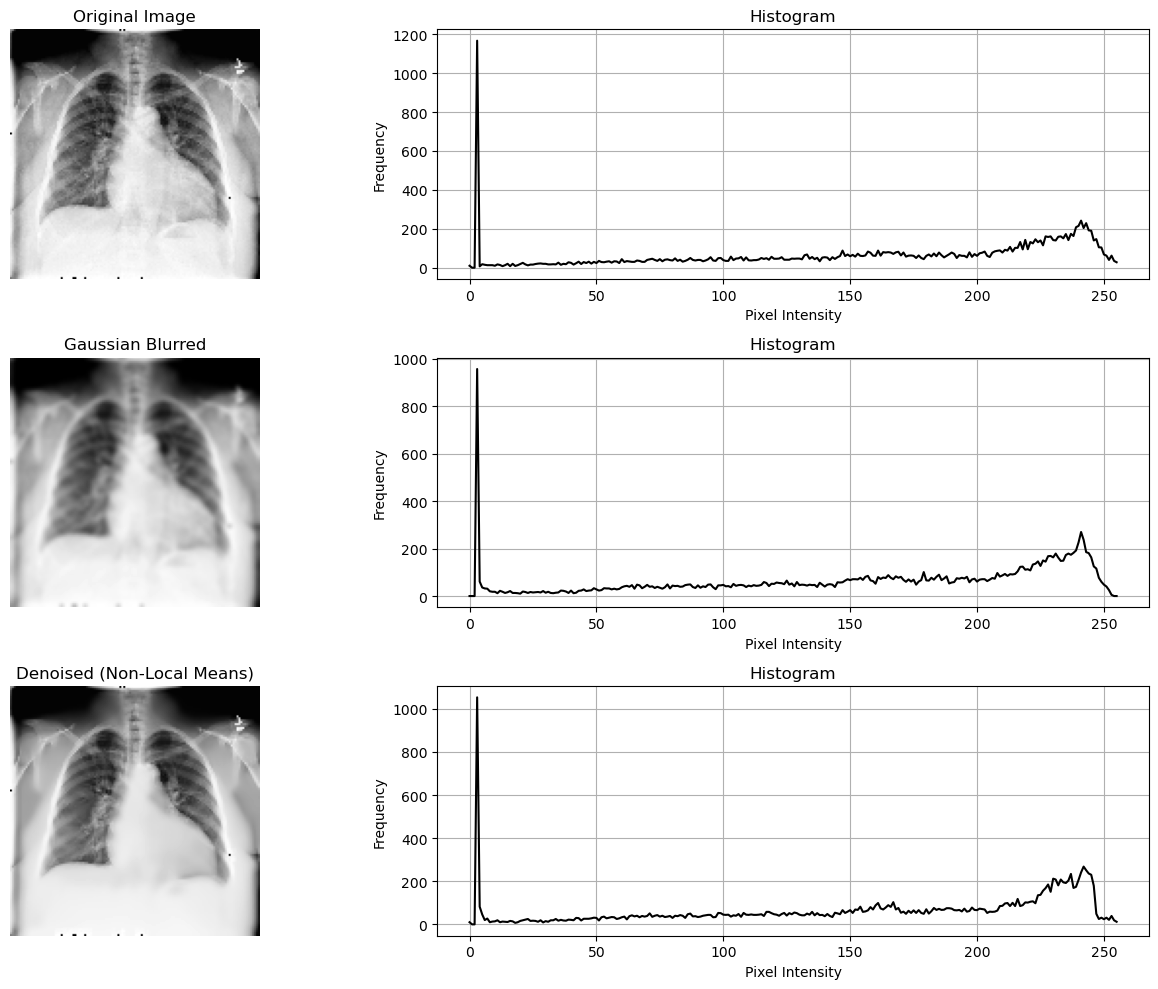

In [26]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load image in grayscale
image = cv2.imread('1.png', cv2.IMREAD_GRAYSCALE)

# ---------------- REMOVE GAUSSIAN NOISE ----------------
# Option 1: Gaussian Blur (simple and fast)
gaussian_blur = cv2.GaussianBlur(image, (5, 5), 0)

# Option 2: Non-Local Means Denoising (better for medical images)
denoised = cv2.fastNlMeansDenoising(image, h=10, templateWindowSize=7, searchWindowSize=21)
'''
h ------> 10 - 20 
templateWindowSize ----> largr (high smooth) / small (miss information - focus on more details)
searchWindowSize ----> large (slower) / small (faster less accurate)
h = 10 - templateWindowSize= 7 - searchWindowSize = 21 
'''

def plot_image_and_hist(image, title, subplot_idx):
    plt.subplot(3, 2, subplot_idx)
    plt.imshow(image, cmap='gray')
    plt.title(title)
    plt.axis('off')
    plt.subplot(3, 2, subplot_idx + 1)
    hist = cv2.calcHist([image], [0], None, [256], [0, 256])
    plt.plot(hist, color='black')
    plt.title('Histogram')
    plt.xlabel('Pixel Intensity')
    plt.ylabel('Frequency')
    plt.grid(True)

plt.figure(figsize=(14, 10))
plot_image_and_hist(image, 'Original Image', 1)
plot_image_and_hist(gaussian_blur, 'Gaussian Blurred', 3)
plot_image_and_hist(denoised, 'Denoised (Non-Local Means)', 5)
plt.tight_layout()
plt.show()
